<a href="https://colab.research.google.com/github/coryroyce/code_assignments/blob/main/211127_Clustering_Techniques/K_Means_Clustering_Cory_Randolph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering
Cory Randolph

11/27/2021

Goal: Demonstrate K-Means Clustering without high level library to show the unerlying algorithm.



# Load Packages

Import basic packages for visualization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import sklearn

# K-Means Overview

K-means uses a relativly simple algorith to group and cluster datapoints based on their distances. In particular the overall process can be summarized as:
1. Randomly guess (k) cluster centers
2. Repeat cluster assignments 
   * Assign every point to the nearest cluster center
   * Recacluate the cluster centers as the new mean 

The end result of the above algorithm is that all of the points will be clustered into groups based on the original number (k) clusters that were choose.

# Create Data

Use a sklearn package to create clusters of data. Let's choose 5 clusters for our example.

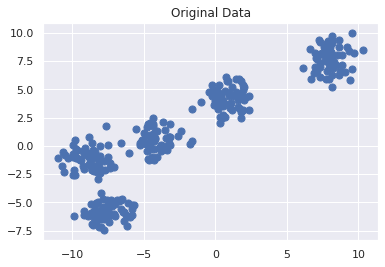

In [2]:
from sklearn.datasets import make_blobs

# Create cluster values in 2 dimensions
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.9, random_state=3)

# Plot the clusters
plt.title('Original Data')
plt.scatter(X[:, 0], X[:, 1], s=50);

# Manual K-Means

The distinct clusters can easily be seen, but now we will apply the K-Means algorith to show them in defferent colors.

In [3]:
from sklearn.metrics import pairwise_distances_argmin

In [4]:
def apply_kmeans(X, n_clusters):

    # Choose initial cluster centers randomly
    rand_idx = np.random.RandomState(3).permutation(X.shape[0])[:n_clusters]
    centers = X[rand_idx]
    
    while True:
        # Set labels based on closest cluster center
        labels = pairwise_distances_argmin(X, centers)
        
        # Calculate new centers
        new_centers = np.array([X[labels == idx].mean(0) for idx in range(n_clusters)])
        
        # Check if centers are not changine
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

Apply our custom K-Means algorith to the dataset.

In [5]:
centers, labels = apply_kmeans(X, 5)

Plot the graphs

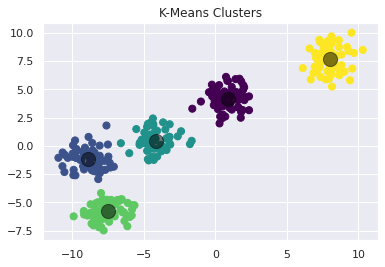

In [6]:
# Plot the data colored by cluster
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

# Add a title
plt.title('K-Means Clusters')

# Define the cluster centers and plot
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# K-Means with Sklearn

Now that we have the manully calulated K-Means, let's show how easy this can be done within Sklearn.

In [7]:
from sklearn.cluster import KMeans

# Use the KMeans model
kmeans = KMeans(n_clusters=5)

# Fit our data to the model
kmeans.fit(X)

# Store the results
y_kmeans = kmeans.predict(X)

Plot the data with clusters colored for reference.

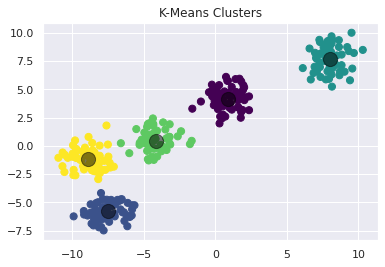

In [8]:
# Define the scatter plot and format
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Add Title
plt.title('K-Means Clusters')

# Define the cluster centers and plot
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Clustering Metrics

Apply clustering metrics to get a sense of how good the clustering algorithm is working.

## Silhouette Score

The silhouette Score can be used to measure the didtance between clusters and does not neccessarily need to know the true labels, but by comparing the score of the ground truth to the algorithms clsuters/predictions we get a good understanding.

Silhouette score for actual labels

In [9]:
silhouette_score_actual = sklearn.metrics.silhouette_score(X = X, labels = y_true, metric='euclidean', sample_size=None, random_state=3)

silhouette_score_actual

0.6971581815434948

Silhouette score for algortithms predictions

In [10]:
silhouette_score_pred = sklearn.metrics.silhouette_score(X = X, labels = y_kmeans, metric='euclidean', sample_size=None, random_state=3)

silhouette_score_pred

0.6971581815434948

Calculate the ratio of the Silhouette score for the predicted over the actual. (The closer to 1 the better)

In [11]:
silhouette_score_ratio = silhouette_score_pred/ silhouette_score_actual

silhouette_score_ratio

1.0

Note: The score of 1 implies that the algorith did a perfect job (maybe some edge cases).

## Adjusted Mutual Information

Adjusted Mutual Information score measure the infomration between clusters. And "adjusted" means that 1 is a perfect score.

In [12]:
sklearn.metrics.adjusted_mutual_info_score(labels_true = y_true, labels_pred = y_kmeans)

1.0

Note: We get a perfect score in this example

## Accuracy and Overall Classification

Classification report provide summary statistics about the correct lables

Map the clusters to correct labels to fist the classification report. Create a custom function.

In [13]:
def get_label_mapping(y_true, y_pred):
  temp_list = []

  for pair in zip(y_pred, y_true):
    if pair in temp_list:
      continue
    else:
      temp_list.append(pair)

  dict_label_mapping = dict(temp_list)

  return dict_label_mapping

In [14]:
# Manually figure out what labels need to be remapped to
label_dict = get_label_mapping(y_true = y_true, y_pred = y_kmeans)

# Convert the predicted values by mapping each label from the dictionary defined above
y_kmeans_mapped = np.vectorize(label_dict.get)(y_kmeans)

print(sklearn.metrics.classification_report(y_true = y_true, y_pred = y_kmeans_mapped))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Accuracy is how many clusters are correctly predicted and is a good initial rating, but doesn't get into the intracacies of clustering.

In [15]:
sklearn.metrics.accuracy_score(y_true = y_true, y_pred = y_kmeans_mapped)

1.0

The accuracy is 100% once values are correctly mapped

# Reference

Majority of this notebook was based off of an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook). [Notebook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb#scrollTo=_u1Ta1uJuFeO)

Performance metrics on clustering [Performance Metrics in Machine Learning ](https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6)